In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection

#Importing necessary libraries

In [145]:
df=pd.read_csv("D:/Data/Spring23/AppliedML-JP/hprice1.csv")

#Reading the data into dataframe

In [146]:
df.head()

#Showing the first five columns of data

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630


In [4]:
df.info()

#Understanding the variables of each column in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     88 non-null     float64
 1   assess    88 non-null     float64
 2   bdrms     88 non-null     int64  
 3   lotsize   88 non-null     int64  
 4   sqrft     88 non-null     int64  
 5   colonial  88 non-null     int64  
 6   lprice    88 non-null     float64
 7   lassess   88 non-null     float64
 8   llotsize  88 non-null     float64
 9   lsqrft    88 non-null     float64
dtypes: float64(6), int64(4)
memory usage: 7.0 KB


In [5]:
df.isna().sum()

#Checking whether the data has null values

price       0
assess      0
bdrms       0
lotsize     0
sqrft       0
colonial    0
lprice      0
lassess     0
llotsize    0
lsqrft      0
dtype: int64

In [6]:
df.describe().T

#Understanding about the count, mean, standard deviation, minimum, maximum and the quartile values for all numeric columns of the data


,count,mean,std,min,25%,50%,75%,max
price,88.0,293.546034,102.713445,111.000000,230.000000,265.500000,326.250000,725.000000
assess,88.0,315.736364,95.314437,198.700000,253.900000,290.200000,352.125000,708.600000
bdrms,88.0,3.568182,0.841393,2.000000,3.000000,3.000000,4.000000,7.000000
lotsize,88.0,9019.863636,10174.150414,1000.000000,5732.750000,6430.000000,8583.250000,92681.000000
sqrft,88.0,2013.693182,577.191583,1171.000000,1660.500000,1845.000000,2227.000000,3880.000000
colonial,88.0,0.693182,0.463816,0.000000,0.000000,1.000000,1.000000,1.000000
lprice,88.0,5.633180,0.303573,4.709530,5.438079,5.581613,5.787642,6.586172
lassess,88.0,5.717994,0.262113,5.291796,5.536940,5.670566,5.863982,6.563291
llotsize,88.0,8.905105,0.544060,6.907755,8.653908,8.768719,9.057567,11.436920
lsqrft,88.0,7.572610,0.258688,7.065613,7.414873,7.520231,7.708266,8.263591


<AxesSubplot:xlabel='price'>

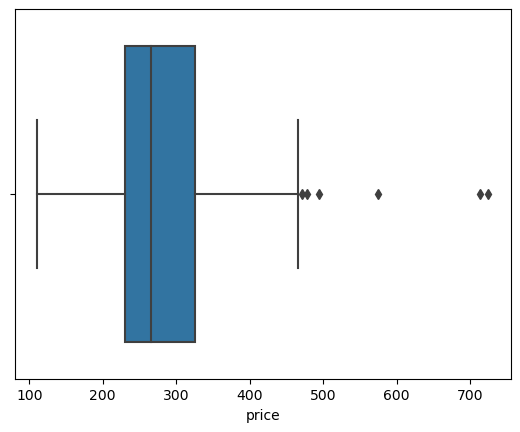

In [9]:
sns.boxplot(x=df.price)

#Creating boxplot for target variable 'price'

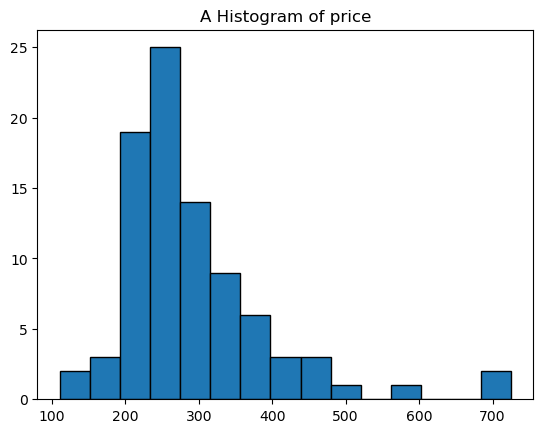

In [15]:
plt.hist(df['price'], bins = 15, edgecolor='black')
plt.title('A Histogram of price')

plt.show()

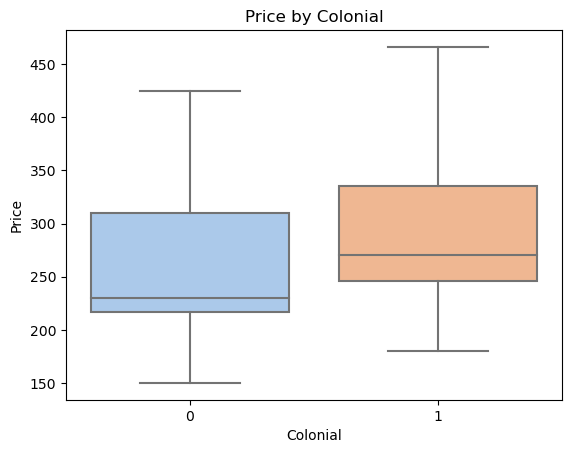

In [18]:
col_price = df[df['colonial'] == '0']
col_price2 = df[df['colonial'] == '1']
sns.boxplot(x='colonial', y='price', data=df, palette='pastel', showfliers=False)
plt.title('Price by Colonial')
plt.xlabel('Colonial')
plt.ylabel('Price')

plt.show()

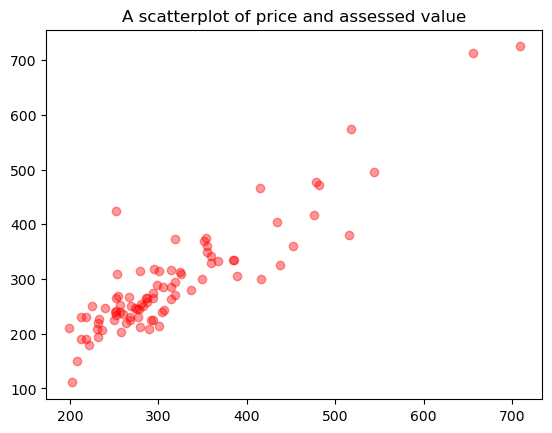

In [21]:
y = df['price']
plt.scatter(df['assess'],y, alpha = 0.4, color="red")
plt.title('A scatterplot of price and assessed value')
plt.show()

<AxesSubplot:>

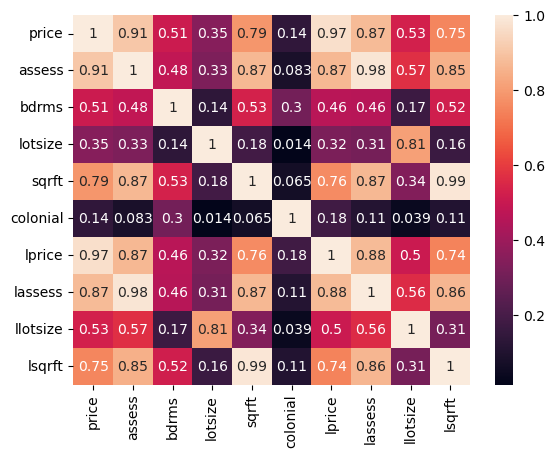

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
df.corr()['price'].sort_values(ascending=False)

price       1.000000
lprice      0.966501
assess      0.905279
lassess     0.873144
sqrft       0.787907
lsqrft      0.750303
llotsize    0.528780
bdrms       0.508084
lotsize     0.347124
colonial    0.137946
Name: price, dtype: float64

In [ ]:
The results suggest that the lprice, assess, lassess, sqrft, and lsqrft variables are the most strongly 
correlated with price, and could potentially be good predictors of the price variable in a linear regression model.

In [28]:
X=df.drop('price',axis=1)
y=df['price']

import statsmodels.api as sm
X=sm.add_constant(X)
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     602.2
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           3.10e-68
Time:                        17:15:42   Log-Likelihood:                -344.74
No. Observations:                  88   AIC:                             709.5
Df Residuals:                      78   BIC:                             734.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        606.3669    246.442      2.460      0.0

In [ ]:
The model has a high R-squared value of 0.986, which indicates that the model fits the data well. 
However, some of the independent variables are not statistically significant, such as bdrms, lotsize, sqrft, colonial, 
llotsize, and lsqrft. Meanwhile, assess, lprice, and lassess have significant positive coefficients, which indicates that 
they have a strong positive impact on the housing prices.

In [29]:
#Perfoming multiple linear regression using the ordinary least squares (OLS) with the independent variables: assess, bdrms, lotsize, sqrft, and colonial, 
# and the dependent variable is price.

import statsmodels.formula.api as smf
mod = smf.ols('price~assess+bdrms+lotsize+sqrft+colonial',df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     80.56
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           3.59e-30
Time:                        17:19:48   Log-Likelihood:                -453.78
No. Observations:                  88   AIC:                             919.6
Df Residuals:                      82   BIC:                             934.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.4477     21.594     -1.873      0.065     -83.405       2.510
assess         0.9041      0.104      8.671      0.000       0.697       1.112
bdrms          9.6303      6.916      1.392      0.168      -4.128      23.389
lotsize        0.0006      0.000      1.206      0.231      -0.000       0.002
sqrft          0.0011      0.017      0.062      0.950      -0.033       0.035
colonial       9.5476     10.647      0.897      0.372     -11.633      30.729
==============================================================================
Omnibus:                       30.541   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.391
Skew:                           0.989   Prob(JB):                     8.77e-26
Kurtosis:                       8.250   Cond. No.                     6.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
The summary shows the results of a linear regression model where the dependent variable is 'price' 
and the independent variables are 'assess', 'bdrms', 'lotsize', 'sqrft', and 'colonial'. 
The coefficients for 'assess' and 'colonial' are statistically significant at the 0.05 level, while the 
coefficients for 'bdrms', 'lotsize', and 'sqrft' are not statistically significant.

In [33]:
reg0 = LinearRegression().fit(X, y)
reg0.score(X, y)

0.9858124019908473

In [ ]:
The linear regression model using features X has a high level of accuracy in predicting the target variable y, 
with a score of 0.986.

In [34]:
reg0.coef_

array([ 0.00000000e+00,  1.23304328e+00,  2.65206573e+00,  3.45239232e-05,
        8.14632004e-03, -4.10046110e-01,  2.76094173e+02, -3.96819396e+02,
        1.75482492e+00, -3.95321970e+00])

In [35]:
#Finding the gives the intercept of the linear regression line.

reg0.intercept_

606.3668534382883

reg0.predict(df)

#Finding the predicted values for the dependent variable based on the independent variables in df.

# stepwise selection

In [40]:
df2=df[['assess','bdrms','lotsize','sqrft','colonial']]

#Making second dataset with just assessed values, bedrooms, lot size, squarefoot and colonial values

In [42]:
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select=3, step=1)
selector = selector.fit(df2, df.lprice)

#Finding the top 3 features from the input data (df2) that are most important in predicting the target variable
#for lprice and eliminating the least important ones one at a time. 

In [43]:
selector.support_

array([ True,  True, False, False,  True])

In [ ]:
We understand from this that assessed value, bedrooms and colonial are selected feature to predicting the price

In [44]:
selector.ranking_

array([1, 1, 3, 2, 1])

In [ ]:
Understanding the ranking of the feature, where assessed value, bedrooms and colonial are ranked = 1 which states its
importance while lot size has ranking of 3 and squarefoot has ranking of 2 stating it isnt as important. 

In [45]:
selector.score(df2,df.lprice)

0.7660486272967826

In [46]:
selector = RFE(LinearRegression(), n_features_to_select=3, step=1)
selector = selector.fit(X, y)

#Now doing the same thing with the previous data including all columns. 

In [47]:
selector.support_

array([False, False, False, False, False, False,  True,  True, False,
        True])

In [ ]:
We understand from this that lprice, lasses and lsqrft important.

In [49]:
selector.ranking_

array([8, 4, 3, 7, 6, 5, 1, 1, 2, 1])

In [48]:
selector.score(X,y)

0.9375091405388294

In [ ]:
The score of the feature selection model on the X and y data is 0.9375, 
indicating a relatively high level of accuracy in predicting the target variable.

In [50]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
Creating an instance of the KNeighborsRegressor object with n_neighbors set to 2 that fits the model to the data X and y

In [51]:
neigh.score(X,y)

0.8338112212004906

In [ ]:
Understanding the R-squared of the prediction which is 0.8338
indicating that the model explains 83.38% of the variability in the target variable.

In [52]:
models = [KNeighborsRegressor(n_neighbors=i) for i in range(1,10)]
[model.fit(X,y).score(X,y) for model in models]

[1.0,
 0.8338112212004906,
 0.6857950391066585,
 0.6233839103125922,
 0.5962037029478449,
 0.5859310606116208,
 0.523239569457552,
 0.49725578509547674,
 0.47008490633225264]

In [ ]:
The results show that the model with one neighbor has a perfect score of 1, while the scores decrease as the number of neighbors
increases, indicating that the model with one neighbor is likely overfitting the data.

# Lasso Regression

In [56]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, y)

Lasso(alpha=0.1)

In [57]:
clf.coef_

array([ 0.00000000e+00,  1.12893685e+00,  3.05007801e+00,  1.20151390e-04,
        4.47031997e-03, -4.47432559e-01,  2.67458869e+02, -3.45323034e+02,
        0.00000000e+00, -0.00000000e+00])

In [62]:
clf.intercept_

384.3518319220508

In [ ]:
Understanding the Coefficients as it shows coefficients of 10 features where first and 
last two coefficients are zero. Second to ninth coefficients indicate the direction and magnitude of relationship 
between each feature and target variable.

In [59]:
np.abs(clf.coef_).sum()

617.4129409632736

In [ ]:
Calculating the sum of the absolute values of the coefficients of the logistic regression model.

In [60]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression()

In [61]:
lm.coef_

array([ 0.00000000e+00,  1.23304328e+00,  2.65206573e+00,  3.45239232e-05,
        8.14632004e-03, -4.10046110e-01,  2.76094173e+02, -3.96819396e+02,
        1.75482492e+00, -3.95321970e+00])

In [ ]:
The positive coefficient value indicates a positive correlation between the feature and the target variable, 
while a negative coefficient value indicates a negative correlation for the 10 features in the dataset

In [63]:
np.abs(clf.coef_).sum()

617.4129409632736

In [ ]:
calculating the sum of the absolute values of the coefficients in the linear regression model.

In [64]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression()

In [65]:
lm.coef_

array([ 0.00000000e+00,  1.23304328e+00,  2.65206573e+00,  3.45239232e-05,
        8.14632004e-03, -4.10046110e-01,  2.76094173e+02, -3.96819396e+02,
        1.75482492e+00, -3.95321970e+00])

In [66]:
lm.intercept_

606.3668534382883

In [67]:
np.abs(lm.coef_).sum()

682.9249491982025

In [68]:
lm.predict(X)

array([302.82562346, 356.97641093, 194.57684333, 192.53143691,
       362.110262  , 442.49958917, 329.32823913, 308.85363643,
       208.42715824, 242.28309541, 286.73040142, 320.10364535,
       409.10689694, 203.87895116, 266.31073784, 238.40403929,
       238.07188022, 281.33048256, 267.71484807, 307.45439993,
       264.45227367, 268.22084598, 217.1300216 , 138.64799817,
       255.62128138, 273.56675403, 229.25937602, 336.93183263,
       481.44158582, 344.5214447 , 248.99424592, 343.61383495,
       267.48647449, 241.36730958, 352.94088903, 200.03337779,
       380.91801527, 548.69987785, 200.25475309, 217.98341911,
       243.24000335, 681.90038864, 249.37934447, 248.32959395,
       366.81663641, 271.77501259, 309.7835882 , 437.1482557 ,
       255.5552748 , 313.98853907, 260.85281136, 251.49695389,
       233.3203139 , 178.36682812, 250.82186604, 250.11661127,
       216.50497657, 258.76532854, 286.31969683, 315.51929204,
       216.82401918, 265.84946958, 319.64833078, 469.20

In [ ]:
Predicting the target variable values based on the X variable values.

In [69]:
lm.predict(X).mean()

293.5460340909089

In [70]:
clf = linear_model.LassoCV()
clf.fit(X,y)

LassoCV()

In [71]:
clf.coef_

array([ 0.        ,  0.76032278,  0.        ,  0.00087578,  0.02759866,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

The array of coefficients returned shows that the first feature has a strong positive association with the target variable, 
while the third and fourth features have a weaker positive association. The other features have zero coefficients, indicating 
they have no effect on the target variable.

In [72]:
clf.intercept_


-9.990200875643438

In [73]:
clf.mse_path_

array([[  5560.18993016,   5546.53215737,  18453.34181092,
          6520.23316232,  16243.19825006],
       [  5511.96774959,   5491.47024322,  18453.34181092,
          6454.65030015,  16243.19825006],
       [  5467.90223051,   5440.84006689,  18453.34181092,
          6394.25917645,  16243.19825006],
       [  5427.59513605,   5394.24906578,  18405.0006983 ,
          6338.60937422,  16243.19825006],
       [  5390.69045074,   5351.34336247,  18209.77346055,
          6287.29392478,  16243.19825006],
       [  5356.86953149,   5311.80356473,  18029.32181149,
          6239.94467421,  15402.66068386],
       [  5325.84684627,   5275.34105615,  17862.43918939,
          6196.22818435,  15140.62193925],
       [  5297.366227  ,   5241.69471713,  17708.02779938,
          6155.84210309,  16057.17693403],
       [  5271.19757239,   5210.62802382,  17565.0877077 ,
          6118.51194738,  17921.67968694],
       [  5247.13394463,   5181.92647907,  17432.7071367 ,
          6083.98824918

In [ ]:
The mse_path_ attribute can be used to visualize the cross-validation process and select the best alpha value for the model. 
Typically, the alpha value with the lowest mean squared error across all folds is chosen as the best alpha value.

In [74]:
clf.mse_path_.mean(1)

array([10464.69906216, 10430.92567079, 10399.90830696, 10361.73050488,
       10296.45988972, 10068.12005316,  9960.09544308, 10092.02155613,
       10417.42098765, 10896.8960799 , 11497.13762771, 12190.06736177,
       12952.09647063, 13763.48475451, 14607.78703016, 15471.37516757,
       16343.02566975, 17213.56403694, 18075.55831238, 18923.05521096,
       19751.35310455, 20556.8068957 , 21336.66047003, 22088.90298921,
       22812.14578341, 23505.51703326, 24168.57180597, 24801.21533549,
       25403.63771866, 25973.68200167, 26256.99815145, 26547.34163609,
       26842.64687317, 27139.38440885, 27434.67882119, 27501.057756  ,
       27519.55922539, 27566.75075947, 27513.55081884, 26128.6179905 ,
       24881.67056281, 23757.84427004, 22743.75083266, 21827.5672977 ,
       20998.84420324, 20249.00803152, 19568.47783846, 18950.73163672,
       18389.33451228, 17878.57207591, 17413.36471465, 16989.19229341,
       16602.02816683, 16248.28132209, 15924.74562499, 15628.55527322,
      

In [ ]:
Computing the mean of the mean squared errors (MSEs) across all folds for 
each value of the regularization parameter in a cross-validated Ridge regression model.

In [75]:
clf.mse_path_.mean(1).argmin()

99

Finding the minimum mean squared error (MSE) from the array of MSE values. 
The output of 99 indicates that the alpha value at index 99 resulted in the lowest mean MSE across all values

In [76]:
clf.alpha_
clf.alphas_[clf.mse_path_.mean(1).argmin()]
clf.predict(X)

array([328.08906766, 323.23096277, 198.00670377, 210.24408554,
       307.34973319, 388.67226673, 334.58500331, 271.47059656,
       223.5435436 , 239.5747628 , 298.47632597, 385.55075736,
       423.85233164, 260.43537142, 278.11993628, 218.8128115 ,
       281.37957252, 277.56267262, 235.70481373, 296.05205992,
       275.10640634, 297.85137018, 267.74852307, 200.52765742,
       220.25550325, 272.29588314, 252.51723211, 329.28434455,
       458.27237733, 325.31637091, 203.22981068, 374.02275496,
       210.58315753, 237.90677094, 324.7492408 , 201.61655346,
       419.41517864, 504.70783868, 266.82014473, 240.84699343,
       253.15836619, 604.98074066, 249.68367269, 188.23832541,
       328.26036903, 237.23209965, 313.62325592, 461.67343912,
       232.77556695, 253.3312455 , 288.91225554, 256.90952501,
       184.4516331 , 213.69965907, 248.9706687 , 258.70081964,
       216.52081162, 264.9944484 , 275.55288497, 298.72197391,
       261.13700955, 258.49321288, 225.76309148, 442.57

In [78]:
clf.predict(X).mean()

293.546034090909

Finding the average predicted value for the input data X using the trained model clf.

In [79]:
lm.predict(X).mean()

293.5460340909089

In [ ]:
Finding the mean of these predicted values across all observations.

In [80]:
clf.predict(X).var()

7968.019601057268

In [81]:
lm.predict(X).var()

10282.185880371799

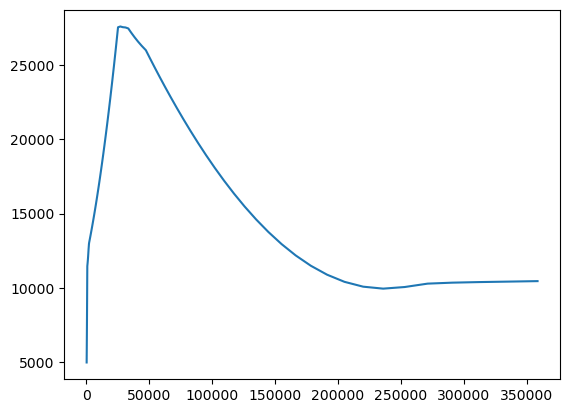

In [82]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

In [83]:
clf = linear_model.LassoCV(alphas=np.linspace(0.00001,0.01,200))
clf.fit(X,y)

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.316e+03, tolerance: 9.179e+01
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=array([1.00000000e-05, 6.02010050e-05, 1.10402010e-04, 1.60603015e-04,
       2.10804020e-04, 2.61005025e-04, 3.11206030e-04, 3.61407035e-04,
       4.11608040e-04, 4.61809045e-04, 5.12010050e-04, 5.62211055e-04,
       6.12412060e-04, 6.62613065e-04, 7.12814070e-04, 7.63015075e-04,
       8.13216080e-04, 8.63417085e-04, 9.13618090e-04, 9.63819095e-04,
       1.01402010e-03, 1.06422111e-0...
       8.84537688e-03, 8.89557789e-03, 8.94577889e-03, 8.99597990e-03,
       9.04618090e-03, 9.09638191e-03, 9.14658291e-03, 9.19678392e-03,
       9.24698492e-03, 9.29718593e-03, 9.34738693e-03, 9.39758794e-03,
       9.44778894e-03, 9.49798995e-03, 9.54819095e-03, 9.59839196e-03,
       9.64859296e-03, 9.69879397e-03, 9.74899497e-03, 9.79919598e-03,
       9.84939698e-03, 9.89959799e-03, 9.94979899e-03, 1.00000000e-02]))

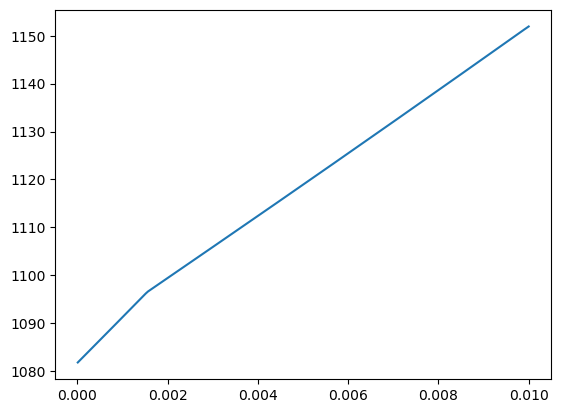

In [84]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

In [85]:
clf.alpha_

1e-05

In [86]:
clf.coef_

array([ 0.00000000e+00,  1.23303625e+00,  2.65210266e+00,  3.45338172e-05,
        8.14474351e-03, -4.10103573e-01,  2.76093485e+02, -3.96815636e+02,
        1.75462310e+00, -3.95008264e+00])

lm.coef_

In [89]:
clf = Ridge(alpha=1.0)
clf.fit(X,y)

Ridge()

Ridge Regression

In [91]:
clf.coef_

array([ 0.00000000e+00,  6.47998526e-01,  7.42184081e+00,  5.81175153e-04,
        9.80882362e-03,  3.77264669e-01,  1.62538772e+02, -4.63797186e+01,
       -7.41719334e+00, -3.30009033e+01])

In [92]:
clf.intercept_

-297.24614382405525

In [93]:
lm.coef_

array([ 0.00000000e+00,  1.23304328e+00,  2.65206573e+00,  3.45239232e-05,
        8.14632004e-03, -4.10046110e-01,  2.76094173e+02, -3.96819396e+02,
        1.75482492e+00, -3.95321970e+00])

In [94]:
lm.intercept_

606.3668534382883

In [95]:
clf.predict(X)


array([319.97294845, 348.26247731, 184.70675215, 194.23434526,
       339.85266007, 431.4971009 , 339.59261464, 300.10849179,
       200.11190227, 236.81645838, 294.29642571, 361.74971575,
       403.12643728, 223.6152896 , 261.75747149, 224.99565091,
       262.78964494, 285.6385433 , 262.09799778, 315.89207378,
       267.7767175 , 280.653673  , 241.88598767, 144.53631543,
       233.80952301, 273.06346836, 230.78811322, 340.41068438,
       484.26716424, 348.79280158, 220.59365283, 353.70395697,
       228.81528678, 235.69670985, 353.68419673, 187.12793991,
       402.11113425, 521.72783808, 234.38032089, 224.43459896,
       249.94344378, 637.46035458, 255.85638497, 215.68450156,
       366.49693058, 247.8662668 , 315.77704714, 438.6047792 ,
       245.8671115 , 297.9387178 , 276.02537912, 249.33277079,
       191.99444344, 171.65970969, 246.24368853, 261.17119172,
       208.98618501, 267.40651375, 283.85828427, 311.29703898,
       241.52282939, 274.43470439, 301.95910931, 469.97

In [96]:
clf.predict(X).mean()

293.546034090909

In [97]:
lm.predict(X).mean()


293.5460340909089

In [98]:
clf.predict(X).var()

9223.233577859906

In [99]:
lm.predict(X).var()

10282.185880371799

In [100]:
clf = linear_model.RidgeCV(alphas=np.linspace(0.1,500,1000),store_cv_values=True,cv=None)
clf.fit(X,y)

RidgeCV(alphas=array([1.00000000e-01, 6.00400400e-01, 1.10080080e+00, 1.60120120e+00,
       2.10160160e+00, 2.60200200e+00, 3.10240240e+00, 3.60280280e+00,
       4.10320320e+00, 4.60360360e+00, 5.10400400e+00, 5.60440440e+00,
       6.10480480e+00, 6.60520521e+00, 7.10560561e+00, 7.60600601e+00,
       8.10640641e+00, 8.60680681e+00, 9.10720721e+00, 9.60760761e+00,
       1.01080080e+01, 1.06084084e+0...
       4.88490791e+02, 4.88991191e+02, 4.89491592e+02, 4.89991992e+02,
       4.90492392e+02, 4.90992793e+02, 4.91493193e+02, 4.91993594e+02,
       4.92493994e+02, 4.92994394e+02, 4.93494795e+02, 4.93995195e+02,
       4.94495596e+02, 4.94995996e+02, 4.95496396e+02, 4.95996797e+02,
       4.96497197e+02, 4.96997598e+02, 4.97497998e+02, 4.97998398e+02,
       4.98498799e+02, 4.98999199e+02, 4.99499600e+02, 5.00000000e+02]),
        store_cv_values=True)

In [101]:
clf.coef_

array([ 0.00000000e+00,  8.70182480e-01,  4.57359080e+00,  2.66944990e-04,
        3.14329773e-02, -6.16599144e-01,  2.48156490e+02, -2.22083256e+02,
       -3.47825815e+00, -7.06904435e+01])

In [102]:
clf.intercept_

375.4474156812802

In [103]:
clf.alpha_

0.1

In [104]:
lm.coef_

array([ 0.00000000e+00,  1.23304328e+00,  2.65206573e+00,  3.45239232e-05,
        8.14632004e-03, -4.10046110e-01,  2.76094173e+02, -3.96819396e+02,
        1.75482492e+00, -3.95321970e+00])

In [105]:
lm.intercept_

606.3668534382883

In [106]:
clf.predict(X)

array([308.58681525, 355.9449682 , 190.53550078, 192.27866741,
       356.71223691, 442.17314359, 333.65915227, 309.04537097,
       201.57518832, 239.64831752, 288.7014036 , 333.06020865,
       409.7079326 , 207.89666286, 262.41912037, 231.50344017,
       245.5712425 , 284.33226359, 271.32175427, 312.4383908 ,
       264.67372609, 271.14794138, 225.15745037, 131.70400807,
       249.30483066, 273.79368011, 227.18833533, 339.28098496,
       487.72151527, 347.72920625, 237.44889511, 347.12046671,
       252.58240567, 236.89971881, 355.34710219, 190.75044291,
       386.72001998, 545.74701565, 209.51520518, 222.44751843,
       246.14774352, 661.40651143, 252.27158893, 242.43749319,
       369.33784014, 262.4061734 , 316.22092625, 442.7278846 ,
       253.99747977, 312.30816146, 265.46968816, 253.03401056,
       216.5626046 , 168.58037321, 248.50665178, 254.09914805,
       210.59132873, 261.53604414, 286.10866297, 315.20266079,
       226.6274616 , 271.02703627, 320.86656497, 469.14

In [107]:
lm.predict(X).mean()

293.5460340909089

In [110]:
lm.predict(X).mean()

293.5460340909089

In [108]:
clf.predict(X).var()

9972.1523723224

In [111]:
lm.predict(X).var()

10282.185880371799

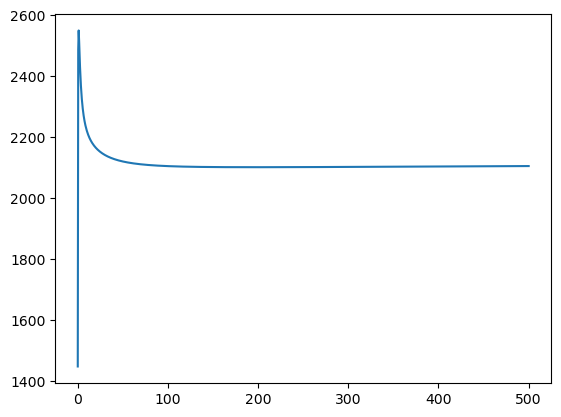

In [109]:
plt.plot(np.linspace(0.1,500,1000),clf.cv_values_.mean(0))

Elastic Regression


In [112]:
clf = linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5)
clf.fit(X, y)

ElasticNet(alpha=0.1)

In [113]:
clf.coef_

array([ 0.00000000e+00,  7.70569002e-01,  8.05864987e+00,  6.98020127e-04,
        1.46168853e-03,  4.14913004e+00,  7.32092678e+01, -8.98751856e+00,
       -6.25899970e+00, -9.07292457e+00])

In [114]:
lm.coef_

array([ 0.00000000e+00,  1.23304328e+00,  2.65206573e+00,  3.45239232e-05,
        8.14632004e-03, -4.10046110e-01,  2.76094173e+02, -3.96819396e+02,
        1.75482492e+00, -3.95321970e+00])

In [119]:
clf.intercept_

-227.1885428652041

In [120]:
lm.intercept_

606.3668534382883

In [121]:
clf = linear_model.ElasticNetCV(alphas=np.linspace(0.0001,0.01,500))
clf.fit(X, y)

ElasticNetCV(alphas=array([0.0001    , 0.00011984, 0.00013968, 0.00015952, 0.00017936,
       0.0001992 , 0.00021904, 0.00023888, 0.00025872, 0.00027856,
       0.0002984 , 0.00031824, 0.00033808, 0.00035792, 0.00037776,
       0.0003976 , 0.00041743, 0.00043727, 0.00045711, 0.00047695,
       0.00049679, 0.00051663, 0.00053647, 0.00055631, 0.00057615,
       0.00059599, 0.00061583, 0.00063567, 0.00065551, 0.00067535,...
       0.00932545, 0.00934529, 0.00936513, 0.00938497, 0.00940481,
       0.00942465, 0.00944449, 0.00946433, 0.00948417, 0.00950401,
       0.00952385, 0.00954369, 0.00956353, 0.00958337, 0.00960321,
       0.00962305, 0.00964289, 0.00966273, 0.00968257, 0.0097024 ,
       0.00972224, 0.00974208, 0.00976192, 0.00978176, 0.0098016 ,
       0.00982144, 0.00984128, 0.00986112, 0.00988096, 0.0099008 ,
       0.00992064, 0.00994048, 0.00996032, 0.00998016, 0.01      ]))

In [122]:
clf.coef_

array([ 0.00000000e+00,  1.20031272e+00,  2.79021098e+00,  5.53723869e-05,
        1.17918414e-02, -3.57096257e-01,  2.74049979e+02, -3.81507377e+02,
        1.23048578e+00, -1.34107661e+01])

In [123]:
lm.coef_

array([ 0.00000000e+00,  1.23304328e+00,  2.65206573e+00,  3.45239232e-05,
        8.14632004e-03, -4.10046110e-01,  2.76094173e+02, -3.96819396e+02,
        1.75482492e+00, -3.95321970e+00])

In [124]:
clf.intercept_

608.8913238120202

In [125]:
clf.alpha_

0.0001

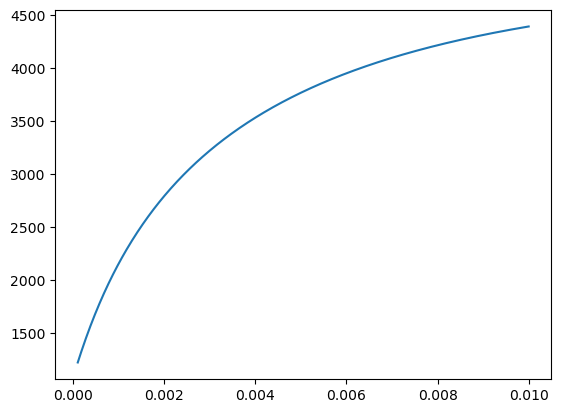

In [126]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

In [127]:
from sklearn.preprocessing import scale 

clf = linear_model.Lars(n_nonzero_coefs=3,normalize=False)
clf.fit(scale(X), y)

Lars(n_nonzero_coefs=3, normalize=False)

In [128]:
clf.coef_

array([ 0.        , 24.63476929,  2.96596345,  0.        ,  0.        ,
        0.        , 72.51564894,  0.        ,  0.        ,  0.        ])

In [129]:
clf.intercept_

293.5460340909092

In [130]:
lm.fit(scale(X),y)

LinearRegression()

In [131]:
lm.coef_

array([   0.        ,  116.85715206,    2.21871365,    0.34925014,
          4.67519519,   -0.18910231,   83.33705802, -103.41889655,
          0.94929027,   -1.01682467])

In [132]:
lm.intercept_

293.54603409090913

In [133]:
clf = linear_model.LarsCV(normalize=False)
clf.fit(scale(X), y)

LarsCV(normalize=False)

In [134]:
clf.coef_

array([ 0.        , 24.72294036,  3.31460786,  0.38836728,  0.        ,
        0.        , 72.66464177,  0.        ,  0.        ,  0.        ])

In [135]:
lm.coef_

array([   0.        ,  116.85715206,    2.21871365,    0.34925014,
          4.67519519,   -0.18910231,   83.33705802, -103.41889655,
          0.94929027,   -1.01682467])

In [136]:
clf.score(scale(X),y)

0.9528766013807646

In [ ]:
The R-squared value is 0.9529, which indicates that the model explains a high proportion of the variance in the target variable

In [137]:
lm.score(scale(X),y)

0.9858124019908473

The output indicates that the model explains 98.58% of the variance in the target variable y. 
This is a high R-squared value, suggesting that the model fits the data well. 

# PCA

Text(0.5, 1.0, 'hp')

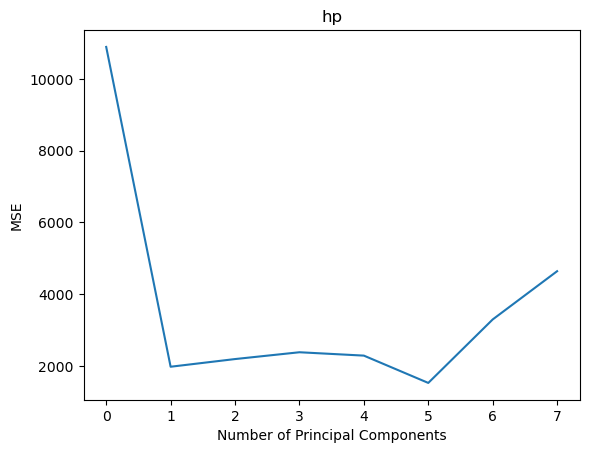

In [140]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = linear_model.LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 8):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

Calculating the cumulative sum of the explained variance ratios for each principal component obtained through 
Principal Component Analysis (PCA), rounded to 4 decimal places and multiplied by 100.

In [142]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 58.02,  74.86,  86.92,  93.34,  96.67,  98.73,  99.7 ,  99.93,
       100.  , 100.  ])

In [144]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:4]

#train PCR model on training data 
regr = linear_model.LinearRegression()
regr.fit(X_reduced_train[:,:4], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

64.16782137916583